<a href="https://colab.research.google.com/github/jojosam90/imagesegmentation/blob/main/mask-rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Update APT (Advanced Package Tool)

In [44]:
!apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/graph

### Clone Github Project

In [45]:
!git clone https://github.com/ahmedfgad/Mask-RCNN-TF2.git

fatal: destination path 'Mask-RCNN-TF2' already exists and is not an empty directory.


#### List Project Contents

In [46]:
!ls Mask-RCNN-TF2

assets				  maskrcnn_predict.py
build				  Mask-RCNN-TF2
dist				  mask_rcnn_tf2.egg-info
images				  mrcnn
Kangaro_mask_rcnn_trained.h5	  mrcnn_directed
kangaroo-transfer-learning	  README.md
LICENSE				  requirements.txt
MANIFEST.in			  samples
mask_rcnn_coco.h5		  setup.cfg
maskrcnn_predict_directed.py	  setup.py
maskrcnn_predict_directed_RPN.py  test.jpg


#### Change current directory to cloned project directory (colab)

In [47]:
!pwd

/content


In [48]:
%cd ./Mask-RCNN-TF2

/content/Mask-RCNN-TF2


#### Install required libraries

In [49]:
!pip3 install tensorflow==2.1.0
!pip3 install keras==2.3.1
!pip3 install h5py==2.10.0   # HDF5 binary data format
!pip3 install scikit-image

In [50]:
import tensorflow
import keras
import h5py

In [51]:
!python3 setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn_tf2.egg-info/PKG-INFO
writing dependency_links to mask_rcnn_tf2.egg-info/dependency_links.txt
writing top-level names to mask_rcnn_tf2.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
a

#### Ensure project is installed successfully

In [52]:
import mrcnn
print(mrcnn)

<module 'mrcnn' from '/content/Mask-RCNN-TF2/mrcnn/__init__.py'>


#### Change directory back to main directory

In [53]:
%cd ../

/content


In [54]:
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn import visualize

import skimage.io
import urllib.request # For downloading model weights
import numpy as np
import matplotlib.pyplot as plt


#### Prepare list of class name

In [55]:
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
print(len(CLASS_NAMES))

81


#### Model Configuration

In [56]:
class SimpleConfig(mrcnn.config.Config):
    NAME="coco_inference"

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES= len(CLASS_NAMES)

#### Model Architrcture

1. **mode**: Can be either **inference** or **training**.
2.**config** : The model configuration.
3.**model_dir** : For saving training logs. Can be excluded when making a prediction.


In [57]:
model = mrcnn.model.MaskRCNN(mode="inference",
                             config=SimpleConfig(),
                             model_dir=None)
model.keras_model.summary()
print(len(model.keras_model.layers))

Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

#### Download the pretrained weights

In [58]:
import urllib.request
urllib.request.urlretrieve('https://github.com/matterport/Mask_RCNN/releases/download/v1.0/mask_rcnn_coco.h5','mask_rcnn_coco.h5')

('mask_rcnn_coco.h5', <http.client.HTTPMessage at 0x7ffa409e6c10>)

#### Load the weights into model 

In [59]:
model.load_weights(filepath='mask_rcnn_coco.h5', 
                   by_name=True, 
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
print("Weights loaded!")

Weights loaded!


Image Shape: (438, 640, 3)



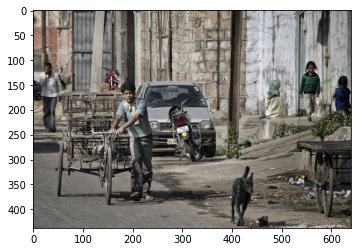

In [60]:
image = skimage.io.imread("/content/Mask-RCNN-TF2/images/6821351586_59aa0dc110_z.jpg")

print("Image Shape:",image.shape,end="\n\n")
plt.imshow(image)
plt.show()

In [61]:
detections = model.detect([image],verbose=0)
print("Number of Images:", len(detections),end="\n\n")

img1_detections = detections[0] # Retrieve first image only

print("Dictionary Keys:", img1_detections.keys(), end="\n\n")
print("Bounding Boxes:\n", img1_detections['rois'], end="\n\n")
print("Class IDs:\n", img1_detections['class_ids'], end="\n\n")
print("Class Names:\n", np.array(CLASS_NAMES)[img1_detections['class_ids']], end="\n\n")
print("Predictions Scores:\n", img1_detections['scores'], end="\n\n")

Number of Images: 1

Dictionary Keys: dict_keys(['rois', 'class_ids', 'scores', 'masks'])

Bounding Boxes:
 []

Class IDs:
 []

Class Names:
 []

Predictions Scores:
 []



#### Visualize Deetcted Objetcs


*** No instances to display *** 



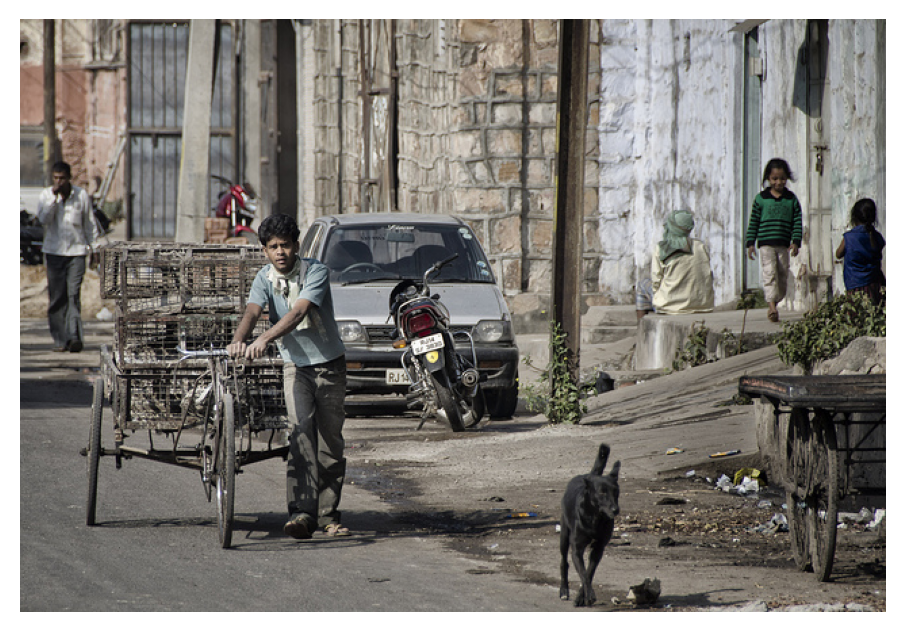

In [62]:
mrcnn.visualize.display_instances(image=image,
                            boxes = img1_detections['rois'],
                            masks = img1_detections['masks'],
                            class_ids=img1_detections['class_ids'],
                            class_names = CLASS_NAMES,
                            scores = img1_detections['scores'],
                            show_bbox = True,
                            show_mask = True,
                            show_mask_polygon = True,
                            show_caption = True,
                            min_score=0.9)